# Amini Cocoa Contamination Challenge
* This explainability report uses EIGENCAM on one of our finetuned Yolo11s models to generate heatmaps that explains the object detection process
* Eigen cam takes the first principle component of the 2D Activations

In [1]:
!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

Cloning into 'YOLO-V11-CAM'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 158 (delta 33), reused 21 (delta 11), pack-reused 99 (from 2)
Receiving objects: 100% (158/158), 52.67 MiB | 35.25 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
!pip install ultralytics --quiet
!pip install ttach --quiet

In [3]:
import ultralytics
from ultralytics import YOLO

import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 

import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [5]:
cd /kaggle/working/YOLO-V11-CAM

/kaggle/working/YOLO-V11-CAM


In [6]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [7]:
test_image_path = "/kaggle/input/amini-cocoa-contamination-dataset/dataset/images/test/ID_BaQafS.jpeg"
model_path = "/kaggle/input/yolo11s-6-7-8/Inference_Weights/runs/detect/train_fold_6_model_yolo11s_imgs_800/weights/best.pt"

model = YOLO(model_path)
model = model.cpu()

In [8]:
img = cv2.imread(test_image_path)
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img)/255


In [9]:
target_layers =[model.model.model[-2]]


0: 800x800 4 healthys, 646.8ms
Speed: 11.2ms preprocess, 646.8ms inference, 21.5ms postprocess per image at shape (1, 3, 800, 800)


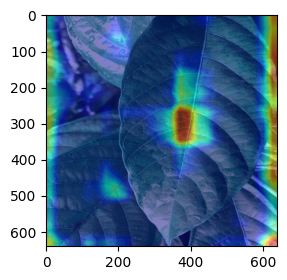

In [10]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

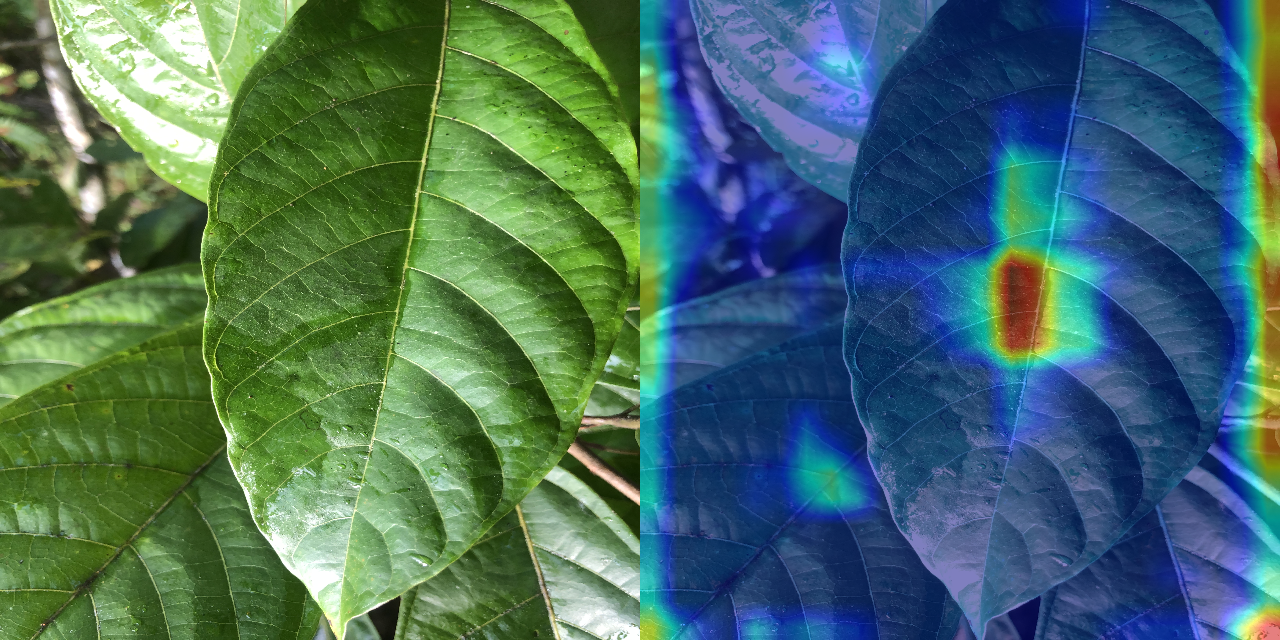

In [11]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))

### Healthy 

In [12]:
# multi scale CAM for yolov11 detection model, 16,19,22 represent small, medium, large object detect head of yolov11.
def doMultiScaleCAM(modelPath, imagePath, modelIndexes=[16,19,22]):
    model = YOLO(modelPath)
    model = model.cpu()
    img = cv2.imread(imagePath)
    img = cv2.resize(img, (640, 640))
    rgb_img = img.copy()
    img = np.float32(img) / 255
    for i in modelIndexes:
        target_layers =[model.model.model[i]]
        cam = EigenCAM(model, target_layers,task='od')
        grayscale_cam = cam(rgb_img)[0, :, :]
        cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
        plt.imshow(cam_image)
        plt.show()
    im = cv2.cvtColor(rgb_img, cv2.COLOR_BGR2RGB)
    res = model(rgb_img)[0]
    res = cv2.cvtColor(res.plot(), cv2.COLOR_BGR2RGB)
    return Image.fromarray(np.hstack((im,res)))


0: 800x800 4 healthys, 518.2ms
Speed: 4.9ms preprocess, 518.2ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


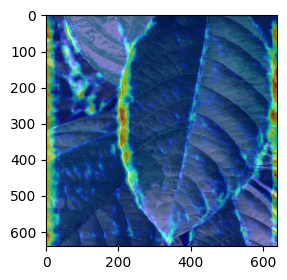


0: 800x800 4 healthys, 461.5ms
Speed: 6.3ms preprocess, 461.5ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)


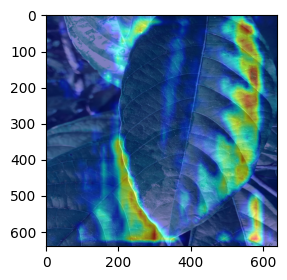


0: 800x800 4 healthys, 449.3ms
Speed: 4.5ms preprocess, 449.3ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)


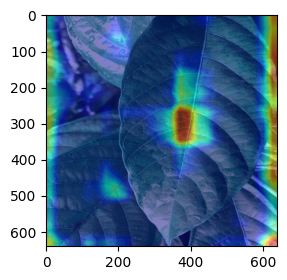


0: 800x800 4 healthys, 449.3ms
Speed: 4.7ms preprocess, 449.3ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


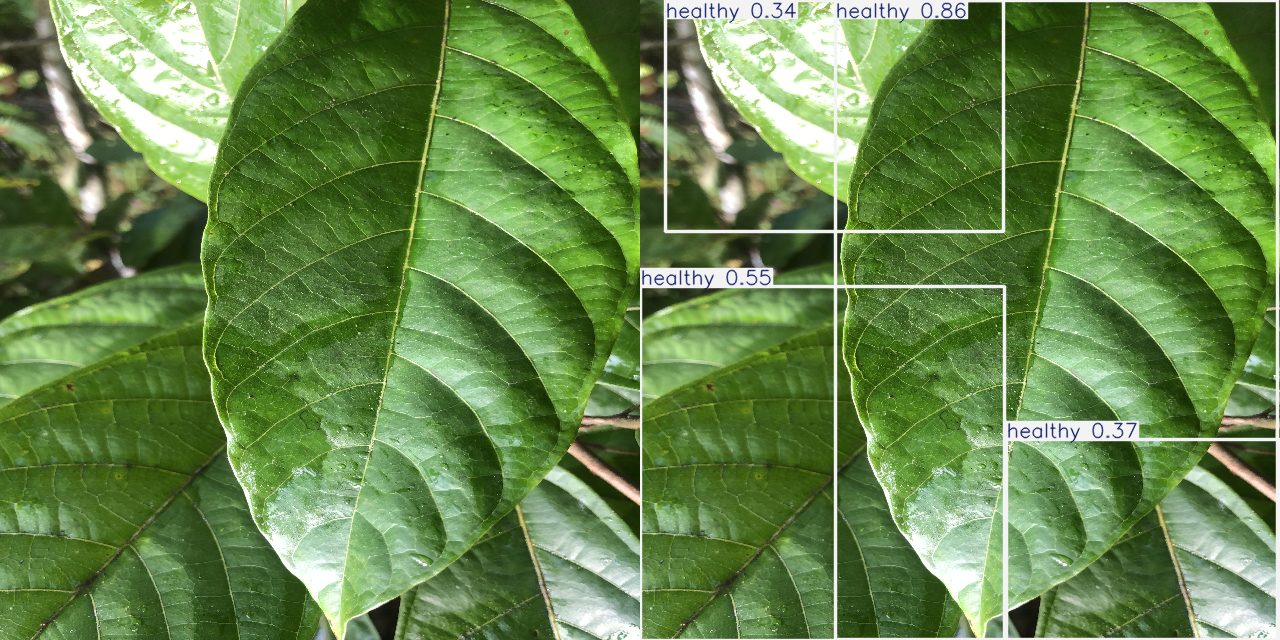

In [13]:
doMultiScaleCAM(model_path, test_image_path)

### Anthracnoses


0: 800x800 3 anthracnoses, 479.0ms
Speed: 4.7ms preprocess, 479.0ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)


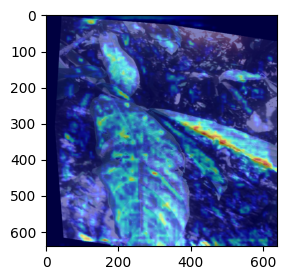


0: 800x800 3 anthracnoses, 470.1ms
Speed: 8.7ms preprocess, 470.1ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


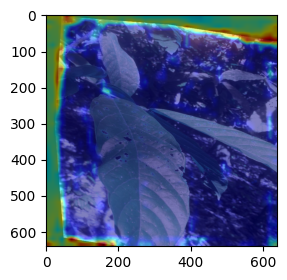


0: 800x800 3 anthracnoses, 491.2ms
Speed: 4.8ms preprocess, 491.2ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)


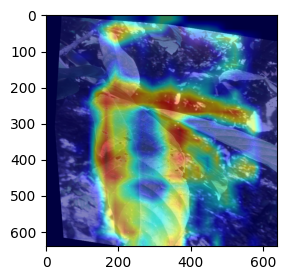


0: 800x800 3 anthracnoses, 502.8ms
Speed: 4.5ms preprocess, 502.8ms inference, 1.5ms postprocess per image at shape (1, 3, 800, 800)


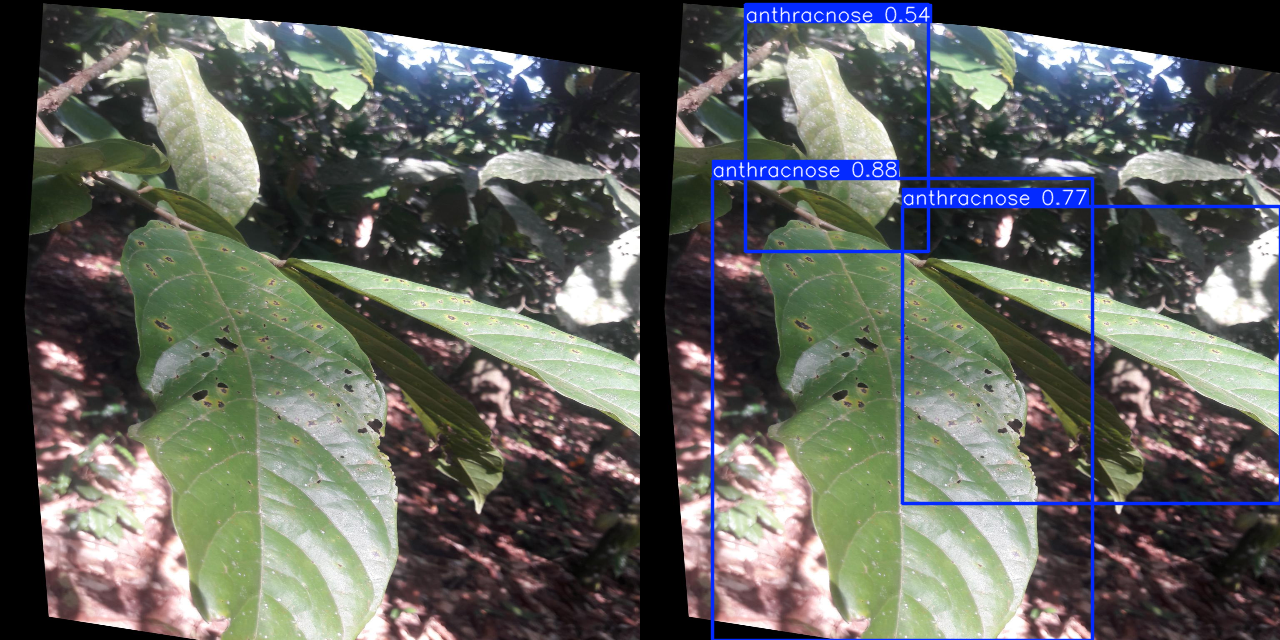

In [14]:
test_image_path_2 = "/kaggle/input/amini-cocoa-contamination-dataset/dataset/images/test/ID_AwZkd2.jpg"
doMultiScaleCAM(model_path, test_image_path_2)

### Cssvd


0: 800x800 1 cssvd, 484.7ms
Speed: 8.0ms preprocess, 484.7ms inference, 1.6ms postprocess per image at shape (1, 3, 800, 800)


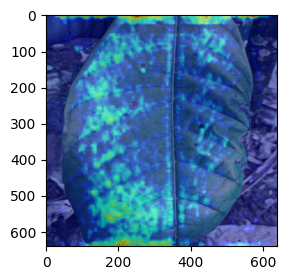


0: 800x800 1 cssvd, 493.7ms
Speed: 5.9ms preprocess, 493.7ms inference, 1.2ms postprocess per image at shape (1, 3, 800, 800)


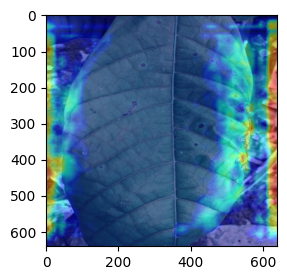


0: 800x800 1 cssvd, 494.9ms
Speed: 7.4ms preprocess, 494.9ms inference, 1.3ms postprocess per image at shape (1, 3, 800, 800)


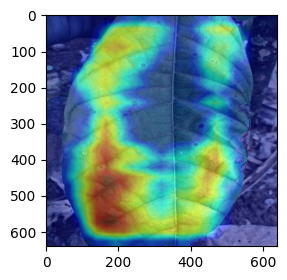


0: 800x800 1 cssvd, 483.1ms
Speed: 4.8ms preprocess, 483.1ms inference, 6.2ms postprocess per image at shape (1, 3, 800, 800)


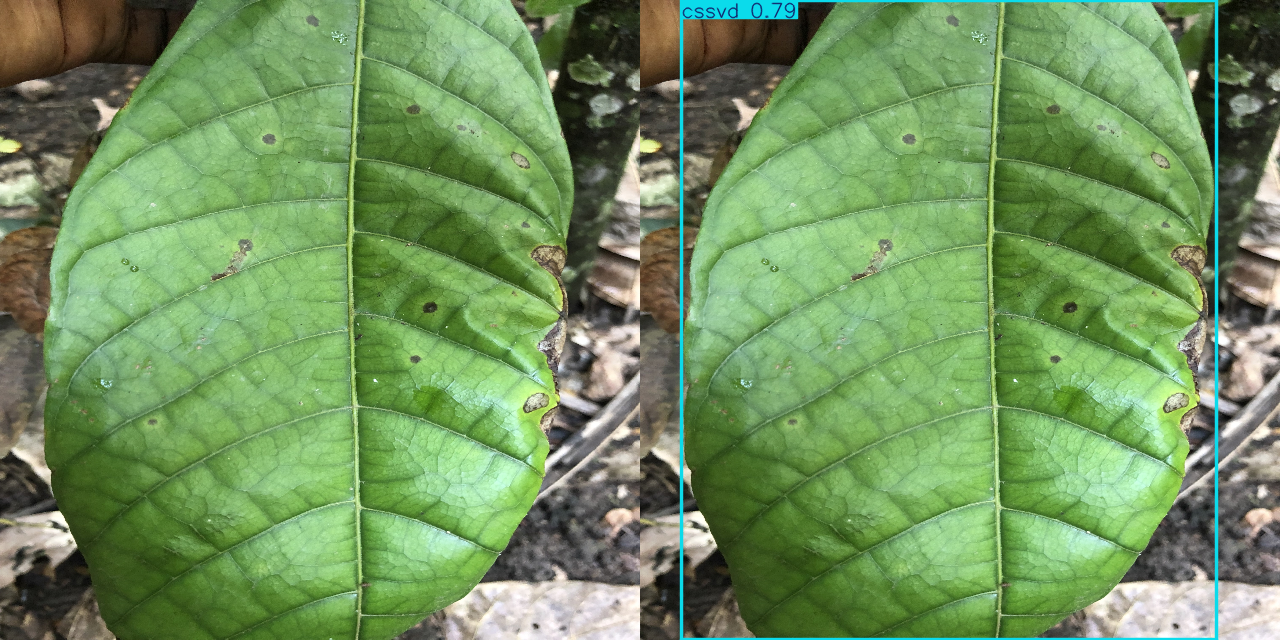

In [15]:
test_image_path_3 = "/kaggle/input/amini-cocoa-contamination-dataset/dataset/images/test/ID_PtAIIA.jpeg"
doMultiScaleCAM(model_path, test_image_path_3)